## Start

In [5]:
import os
os.getcwd()

'C:\\Users\\ilyat\\Documents'

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,15)})

In [2]:
# new_items_by_su = pd.read_csv('C://Users/ilyat/Documents/new_items_by_support_users.csv', encoding = 'UTF-8')
support_tickets = pd.read_csv('C://Users/ilyat/Documents/support_tickets.csv', encoding = 'UTF-8', 
                              parse_dates=['activity_start_dt',  'fact_reaction_dt'])
# users_eos = pd.read_csv('C://Users/ilyat/Documents/users_evaluation_of_satisfaction.csv', encoding = 'UTF-8')

# Support_tickets

In [3]:
support_tickets.head()

,user_id,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt
0,370 518 212,Технические вопросы,Доступ к сайту,Решено,045be6ac-d532-4c20-b1c9-fb82c1737464,2015-11-26 22:56:00,2015-12-03 12:11:00
1,2 138 799,Технические вопросы,Доступ к сайту,Решено,8ebbb8c6-7abb-4fad-a83b-35a71a83a186,2015-12-18 08:52:00,2015-12-23 06:40:00
2,2 033 101,Технические вопросы,Доступ к сайту,Решено,ee303751-4a21-4544-a4c3-56924c088028,2015-12-16 19:06:00,2015-12-26 07:46:00
3,177 122 000 003,Мобильный Avito,Android приложение,Решено,bb989fcb-277a-41bd-aaa2-f131333b629e,2015-12-01 17:08:00,2015-12-09 11:19:00
4,37 340 500 064,Технические вопросы,Доступ к сайту,Решено,e742d172-0ef1-47d8-b862-25be082d8bc0,2015-12-14 10:08:00,2015-12-15 16:14:00


In [4]:
support_tickets['spent_time_hours'] = (support_tickets['fact_reaction_dt'] - support_tickets['activity_start_dt']) // np.timedelta64(1, 'h')

In [5]:
support_tickets['month'] = support_tickets['activity_start_dt'].dt.month_name()
support_tickets.head()

,user_id,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt,spent_time_hours,month
0,370 518 212,Технические вопросы,Доступ к сайту,Решено,045be6ac-d532-4c20-b1c9-fb82c1737464,2015-11-26 22:56:00,2015-12-03 12:11:00,157,November
1,2 138 799,Технические вопросы,Доступ к сайту,Решено,8ebbb8c6-7abb-4fad-a83b-35a71a83a186,2015-12-18 08:52:00,2015-12-23 06:40:00,117,December
2,2 033 101,Технические вопросы,Доступ к сайту,Решено,ee303751-4a21-4544-a4c3-56924c088028,2015-12-16 19:06:00,2015-12-26 07:46:00,228,December
3,177 122 000 003,Мобильный Avito,Android приложение,Решено,bb989fcb-277a-41bd-aaa2-f131333b629e,2015-12-01 17:08:00,2015-12-09 11:19:00,186,December
4,37 340 500 064,Технические вопросы,Доступ к сайту,Решено,e742d172-0ef1-47d8-b862-25be082d8bc0,2015-12-14 10:08:00,2015-12-15 16:14:00,30,December


In [6]:
from pandas.api.types import CategoricalDtype

In [7]:
months = ['August','September','October','November','December']
cat_type = CategoricalDtype(categories=months, ordered=True)
support_tickets['month'] = support_tickets['month'].astype(cat_type)

Почему не по user_id? - Потому что у одого юзера может быть не одно обращение. А нам важен сам факт обращения

In [8]:
overall_requests_by_month = support_tickets.pivot_table(index = 'ticket_category',
                           columns = 'month',
                           aggfunc = {'request_id':'count', 'spent_time_hours': np.sum}).fillna(0) 
# \
#     .rename(columns = 
#             {'request_id':'Кол-во тикетов, шт.', 'spent_time_hours':'Кол-во затраченных часов на выполнение тикета, час'}, level = 0)
# overall_requests_by_month.columns.set_levels(['Август','Сентябрь','Октябрь','Ноябрь','Декабрь'],level=1, inplace = True)
overall_requests_by_month

request_id                    \
month                                         August September October   
ticket_category                                                          
Безопасность на Avito                              0      2215    3164   
Блокировки и отклонения                            0     57525   59743   
Магазины, Автозагрузка и юридические лица          2       694    1128   
Мобильный Avito                                    0       361     425   
Платные услуги и сервисы                           2      5103    7914   
Работа с объявлениями и личным кабинетом           0     19192   20480   
Рекламные сервисы Avito                            1       825     838   
Технические вопросы                                2     12965   12719   

                                                            spent_time_hours  \
month                                     November December           August   
ticket_category                                                                
Безопасность на Avito                         3732     3889              0.0   
Блокировки и отклонения                      45162    47585              0.0   
Магазины, Автозагрузка и юридические лица     1329     1839             31.0   
Мобильный Avito                                403      400              0.0   
Платные услуги и сервисы                      7558     7742            440.0   
Работа с объявлениями и личным кабинетом     19074    17407              0.0   
Рекламные сервисы Avito                        866      849             44.0   
Технические вопросы                          16934    17463            617.0   

                                                                            \
month                                      September    October   November   
ticket_category                                                              
Безопасность на Avito                        49752.0    72163.0    64556.0   
Блокировки и отклонения                    1527790.0  2693898.0  1719307.0   
Магазины, Автозагрузка и юридические лица    29104.0    64885.0    55321.0   
Мобильный Avito                              14835.0    45925.0    55304.0   
Платные услуги и сервисы                    215912.0   837738.0  1061674.0   
Работа с объявлениями и личным кабинетом    499966.0  1341276.0  1038602.0   
Рекламные сервисы Avito                      33877.0    44803.0    40983.0   
Технические вопросы                         486224.0  1009607.0  1769735.0   

                                                      
month                                       December  
ticket_category                                       
Безопасность на Avito                        62288.0  
Блокировки и отклонения                    2124058.0  
Магазины, Автозагрузка и юридические лица    47611.0  
Мобильный Avito                              34180.0  
Платные услуги и сервисы                    606389.0  
Работа с объявлениями и личным кабинетом   1003204.0  
Рекламные сервисы Avito                      24582.0  
Технические вопросы                         975871.0

In [9]:
fig1 = support_tickets.pivot_table(index = 'ticket_category',
                           columns = 'month',
                            values = 'request_id',
                            aggfunc = 'count')
fig1
# \
# .plot(kind = 'barh', title = "Количество запросов внутри категорий по месяцам", xlabel = 'Категории тикета', fontsize = 15);

month,August,September,October,November,December
ticket_category,,,,,
Безопасность на Avito,NaN,2215.0,3164.0,3732.0,3889.0
Блокировки и отклонения,NaN,57525.0,59743.0,45162.0,47585.0
"Магазины, Автозагрузка и юридические лица",2.0,694.0,1128.0,1329.0,1839.0
Мобильный Avito,NaN,361.0,425.0,403.0,400.0
Платные услуги и сервисы,2.0,5103.0,7914.0,7558.0,7742.0
Работа с объявлениями и личным кабинетом,NaN,19192.0,20480.0,19074.0,17407.0
Рекламные сервисы Avito,1.0,825.0,838.0,866.0,849.0
Технические вопросы,2.0,12965.0,12719.0,16934.0,17463.0


[Text(0, 0.5, 'Безопасность на Avito'),
 Text(0, 1.5, 'Блокировки и отклонения'),
 Text(0, 2.5, 'Магазины, Автозагрузка и юридические лица'),
 Text(0, 3.5, 'Мобильный Avito'),
 Text(0, 4.5, 'Платные услуги и сервисы'),
 Text(0, 5.5, 'Работа с объявлениями и личным кабинетом'),
 Text(0, 6.5, 'Рекламные сервисы Avito'),
 Text(0, 7.5, 'Технические вопросы')]

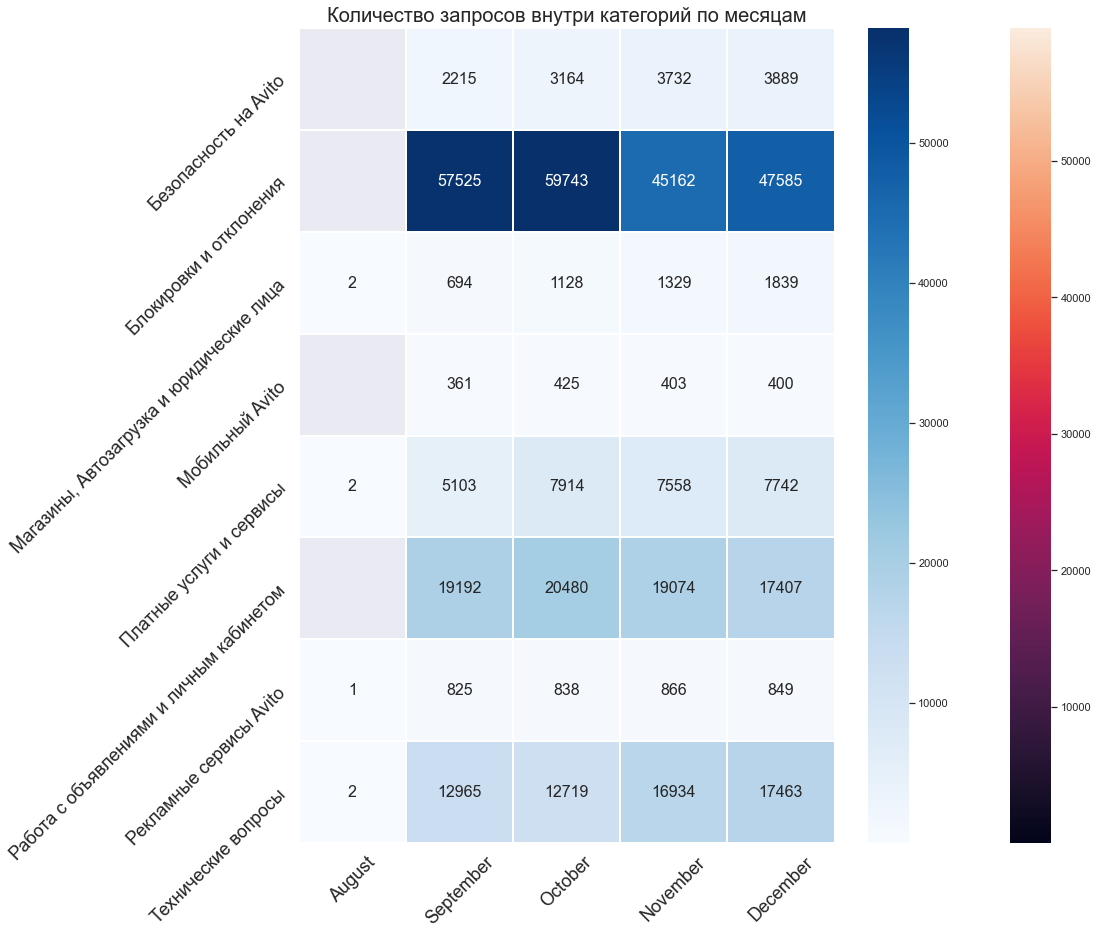

In [10]:
ax = sns.heatmap(fig1)
heatmap1 = sns.heatmap(fig1, annot = True, linewidths=1, fmt="g", cmap="Blues", yticklabels= True,robust = True,annot_kws={"size": 16})
plt.title('Количество запросов внутри категорий по месяцам', fontsize = 20)
plt.xlabel('') 
plt.ylabel('')
heatmap1.set_xticklabels(heatmap1.get_xmajorticklabels(), fontsize = 18, rotation=45)
heatmap1.set_yticklabels(heatmap1.get_ymajorticklabels(), fontsize = 18, rotation=45)

In [11]:
fig2 = support_tickets.pivot_table(index = 'ticket_category',
                           columns = 'month',
                            values = 'spent_time_hours',
                            aggfunc = 'sum');
fig2

month,August,September,October,November,December
ticket_category,,,,,
Безопасность на Avito,NaN,49752.0,72163.0,64556.0,62288.0
Блокировки и отклонения,NaN,1527790.0,2693898.0,1719307.0,2124058.0
"Магазины, Автозагрузка и юридические лица",31.0,29104.0,64885.0,55321.0,47611.0
Мобильный Avito,NaN,14835.0,45925.0,55304.0,34180.0
Платные услуги и сервисы,440.0,215912.0,837738.0,1061674.0,606389.0
Работа с объявлениями и личным кабинетом,NaN,499966.0,1341276.0,1038602.0,1003204.0
Рекламные сервисы Avito,44.0,33877.0,44803.0,40983.0,24582.0
Технические вопросы,617.0,486224.0,1009607.0,1769735.0,975871.0


In [12]:
ax = sns.heatmap(fig_2)
heatmap1 = sns.heatmap(fig_2, annot = True, linewidths=1, fmt="g", cmap="Blues", yticklabels= True,robust = True,annot_kws={"size": 16})
plt.title('Количество затраченных часов на решений вопросов внутри категорий по месяцам', fontsize = 20) 
plt.xlabel('') 
plt.ylabel('')
heatmap1.set_xticklabels(heatmap1.get_xmajorticklabels(), fontsize = 18, rotation=45)
heatmap1.set_yticklabels(heatmap1.get_ymajorticklabels(), fontsize = 18, rotation=45)

NameError: name 'fig_2' is not defined

# Users_eos

In [13]:
# new_items_by_su = pd.read_csv('C://Users/ilyat/Documents/new_items_by_support_users.csv', encoding = 'UTF-8')
# support_tickets = pd.read_csv('C://Users/ilyat/Documents/support_tickets.csv', encoding = 'UTF-8', 
#                               parse_dates=['activity_start_dt',  'fact_reaction_dt'])
users_eos = pd.read_csv('C://Users/ilyat/Documents/users_evaluation_of_satisfaction.csv', encoding = 'UTF-8')

In [14]:
users_eos.head()

,request_id,result_mentioned_by_user
0,09e34912-b4df-4e91-b3e0-35b40fe6b9b8,Не удовлетворительно
1,76099bef-7ab3-4a01-96c3-4c06f4032a7e,Не удовлетворительно
2,70acfed6-8897-4e38-a407-65150e7a4395,Удовлетворительно
3,64c7a6c8-8bfe-4f35-b662-9091b3472e6f,Не удовлетворительно
4,b08d9414-7167-4f7f-9837-fe6e535f4fb6,Не удовлетворительно


In [15]:
users_eos.dropna(inplace = True)

In [16]:
users_eos['request_id'].count()

217414

In [17]:
users_results = ['Не удовлетворительно','Удовлетворительно','Нейтрально','Хорошо','Отлично']
cat_type1 = CategoricalDtype(categories=users_results, ordered=True)
users_eos['result_mentioned_by_user'] = users_eos['result_mentioned_by_user'].astype(cat_type1)

In [18]:
combinbed_with_results_by_user = support_tickets.merge(users_eos, left_on='request_id', right_on='request_id', how = 'inner')

In [19]:
overall_results_by_user = combinbed_with_results_by_user.pivot_table(index = 'ticket_category',
                           columns = ['month','result_mentioned_by_user'],
                           aggfunc = {'request_id':'count'})
overall_results_by_user.fillna(0)

request_id  \
month                                                   August   
result_mentioned_by_user                  Не удовлетворительно   
ticket_category                                                  
Безопасность на Avito                                        0   
Блокировки и отклонения                                      0   
Магазины, Автозагрузка и юридические лица                    0   
Мобильный Avito                                              0   
Платные услуги и сервисы                                     0   
Работа с объявлениями и личным кабинетом                     0   
Рекламные сервисы Avito                                      0   
Технические вопросы                                          0   

                                                                               \
month                                                                           
result_mentioned_by_user                  Удовлетворительно Нейтрально Хорошо   
ticket_category                                                                 
Безопасность на Avito                                     0          0      0   
Блокировки и отклонения                                   0          0      0   
Магазины, Автозагрузка и юридические лица                 0          0      0   
Мобильный Avito                                           0          0      0   
Платные услуги и сервисы                                  0          0      0   
Работа с объявлениями и личным кабинетом                  0          0      0   
Рекламные сервисы Avito                                   0          0      0   
Технические вопросы                                       0          0      0   

                                                                        \
month                                                        September   
result_mentioned_by_user                  Отлично Не удовлетворительно   
ticket_category                                                          
Безопасность на Avito                           0                  142   
Блокировки и отклонения                         0                 3946   
Магазины, Автозагрузка и юридические лица       1                   39   
Мобильный Avito                                 0                   14   
Платные услуги и сервисы                        0                  413   
Работа с объявлениями и личным кабинетом        0                  775   
Рекламные сервисы Avito                         0                   79   
Технические вопросы                             1                  599   

                                                                               \
month                                                                           
result_mentioned_by_user                  Удовлетворительно Нейтрально Хорошо   
ticket_category                                                                 
Безопасность на Avito                                    45         67    130   
Блокировки и отклонения                                 940       1353   2455   
Магазины, Автозагрузка и юридические лица                 9         19     32   
Мобильный Avito                                           3          3      6   
Платные услуги и сервисы                                104        178    231   
Работа с объявлениями и личным кабинетом                254        418    792   
Рекламные сервисы Avito                                  23         28     34   
Технические вопросы                                     160        283    627   

                                                   ...                       \
month                                              ...             November   
result_mentioned_by_user                  Отлично  ... Не удовлетворительно   
ticket_category                                    ...                        
Безопасность на Avito                         322  ...                  126   
Блокировки и отклонения      

In [20]:
overall_results_by_user = combinbed_with_results_by_user.pivot_table(index = 'ticket_category',
                           columns = ['month','result_mentioned_by_user'],
                           aggfunc = {'request_id':'count'})
overall_results_by_user.fillna(0)
# .rename(columns = 
#             {'request_id':'Кол-во тикетов, шт.'}, level = 0)
# overall_results_by_user.columns.set_levels(['Август','Сентябрь','Октябрь','Ноябрь','Декабрь'],level=1, inplace = True)
overall_results_by_user

request_id  \
month                                                   August   
result_mentioned_by_user                  Не удовлетворительно   
ticket_category                                                  
Безопасность на Avito                                        0   
Блокировки и отклонения                                      0   
Магазины, Автозагрузка и юридические лица                    0   
Мобильный Avito                                              0   
Платные услуги и сервисы                                     0   
Работа с объявлениями и личным кабинетом                     0   
Рекламные сервисы Avito                                      0   
Технические вопросы                                          0   

                                                                               \
month                                                                           
result_mentioned_by_user                  Удовлетворительно Нейтрально Хорошо   
ticket_category                                                                 
Безопасность на Avito                                     0          0      0   
Блокировки и отклонения                                   0          0      0   
Магазины, Автозагрузка и юридические лица                 0          0      0   
Мобильный Avito                                           0          0      0   
Платные услуги и сервисы                                  0          0      0   
Работа с объявлениями и личным кабинетом                  0          0      0   
Рекламные сервисы Avito                                   0          0      0   
Технические вопросы                                       0          0      0   

                                                                        \
month                                                        September   
result_mentioned_by_user                  Отлично Не удовлетворительно   
ticket_category                                                          
Безопасность на Avito                           0                  142   
Блокировки и отклонения                         0                 3946   
Магазины, Автозагрузка и юридические лица       1                   39   
Мобильный Avito                                 0                   14   
Платные услуги и сервисы                        0                  413   
Работа с объявлениями и личным кабинетом        0                  775   
Рекламные сервисы Avito                         0                   79   
Технические вопросы                             1                  599   

                                                                               \
month                                                                           
result_mentioned_by_user                  Удовлетворительно Нейтрально Хорошо   
ticket_category                                                                 
Безопасность на Avito                                    45         67    130   
Блокировки и отклонения                                 940       1353   2455   
Магазины, Автозагрузка и юридические лица                 9         19     32   
Мобильный Avito                                           3          3      6   
Платные услуги и сервисы                                104        178    231   
Работа с объявлениями и личным кабинетом                254        418    792   
Рекламные сервисы Avito                                  23         28     34   
Технические вопросы                                     160        283    627   

                                                   ...                       \
month                                              ...             November   
result_mentioned_by_user                  Отлично  ... Не удовлетворительно   
ticket_category                                    ...                        
Безопасность на Avito                         322  ...                  126   
Блокировки и отклонения      

In [21]:
fig_3 = combinbed_with_results_by_user.pivot_table(index = 'result_mentioned_by_user',
                           columns = 'month',
                            values = 'request_id',
                            aggfunc = 'count')

# .plot(kind = 'barh', title = "Количество и качество оценок пользователей по запросам в ТП по месяцам");

In [22]:
from matplotlib.colors import ListedColormap

[Text(0, 0, 'August'),
 Text(1, 0, 'September'),
 Text(2, 0, 'October'),
 Text(3, 0, 'November'),
 Text(4, 0, 'December')]

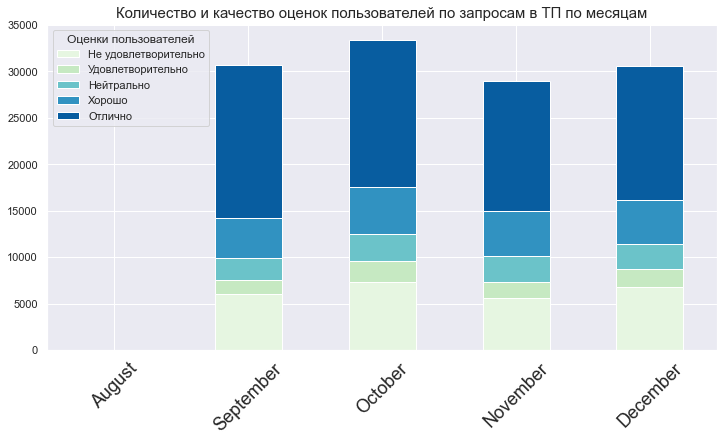

In [23]:
stacked_1 = fig_3 \
  .T.plot(kind='bar', stacked=True,
          colormap=ListedColormap(sns.color_palette("GnBu", 10)), 
          figsize=(12,6))
plt.xlabel('') 
plt.ylabel('')
plt.title('Количество и качество оценок пользователей по запросам в ТП по месяцам', fontsize = 15)
plt.legend(title = 'Оценки пользователей')
stacked_1.set_xticklabels(stacked_1.get_xmajorticklabels(), fontsize = 18, rotation=45)
# stacked_1.set_yticklabels(stacked_1.get_ymajorticklabels(), fontsize = 18, rotation=45)

In [24]:
fig_4 = combinbed_with_results_by_user.pivot_table(index = 'result_mentioned_by_user',
                           columns = 'ticket_category',
                            values = 'request_id',
                            aggfunc = 'count')
# .plot(kind = 'bar', title = "Количество и качество оценок пользователей по запросам в ТП по категориям");

[Text(0, 0, 'Безопасность на Avito'),
 Text(1, 0, 'Блокировки и отклонения'),
 Text(2, 0, 'Магазины, Автозагрузка и юридические лица'),
 Text(3, 0, 'Мобильный Avito'),
 Text(4, 0, 'Платные услуги и сервисы'),
 Text(5, 0, 'Работа с объявлениями и личным кабинетом'),
 Text(6, 0, 'Рекламные сервисы Avito'),
 Text(7, 0, 'Технические вопросы')]

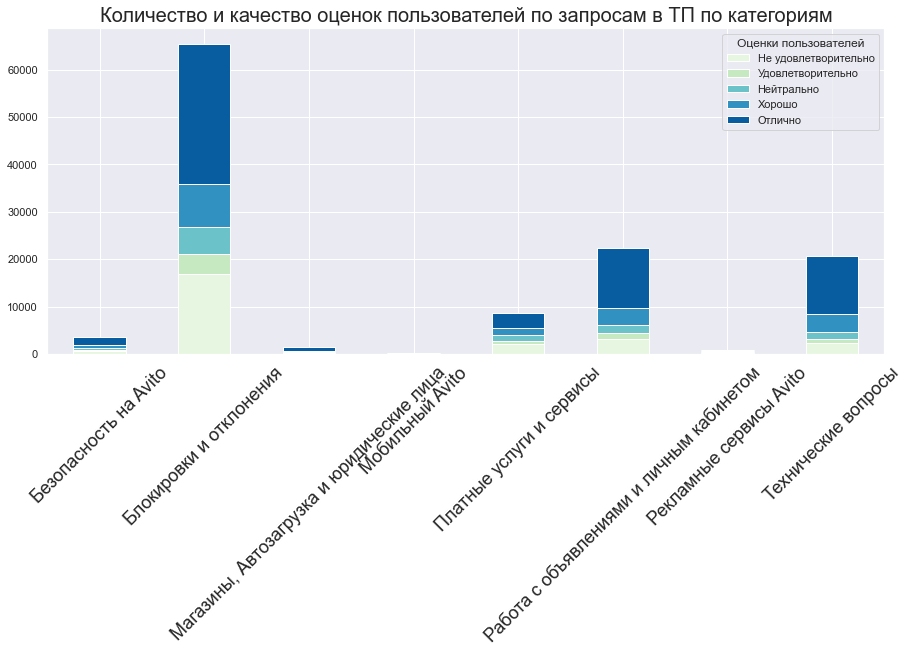

In [25]:
stacked_1 = fig_4 \
  .T.plot(kind='bar', stacked=True,
          colormap=ListedColormap(sns.color_palette("GnBu", 10)), 
          figsize=(15,6))
plt.xlabel('') 
plt.ylabel('')
plt.title('Количество и качество оценок пользователей по запросам в ТП по категориям', fontsize = 20)
plt.legend(title = 'Оценки пользователей')
stacked_1.set_xticklabels(stacked_1.get_xmajorticklabels(), fontsize = 18, rotation=45)
# stacked_1.set_yticklabels(stacked_1.get_ymajorticklabels(), fontsize = 18, rotation=45)

Имеется ли вообще зависимость между временем решения тикета и полученной оценкой?
Сравним:

In [26]:
combinbed_with_results_by_user.pivot_table(index = 'spent_time_hours',
                           columns = 'result_mentioned_by_user',
                            values = 'request_id',
                            aggfunc = 'count', margins = True).dropna()

result_mentioned_by_user,Не удовлетворительно,Удовлетворительно,Нейтрально,Хорошо,Отлично,All
spent_time_hours,,,,,,
0,3102.0,838.0,1382.0,2660.0,12528.0,20510
1,1302.0,345.0,489.0,893.0,3723.0,6752
2,837.0,224.0,275.0,552.0,2181.0,4069
3,725.0,190.0,249.0,475.0,1645.0,3284
4,600.0,149.0,185.0,307.0,1293.0,2534
...,...,...,...,...,...,...
481,4.0,3.0,3.0,2.0,3.0,15
522,6.0,2.0,2.0,2.0,1.0,13
545,3.0,1.0,2.0,2.0,3.0,11


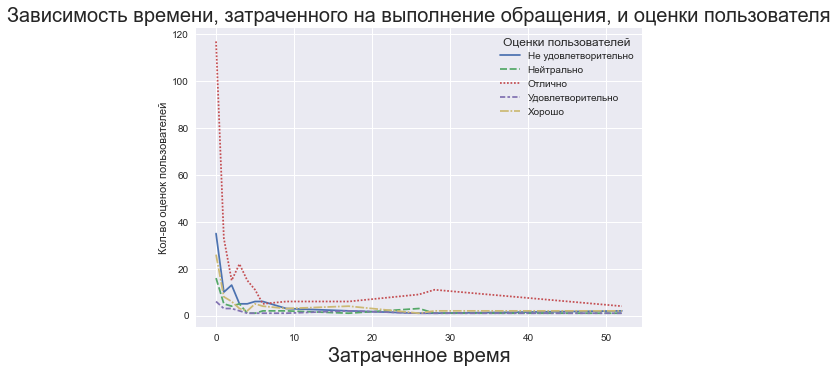

In [608]:
fig_5 = combinbed_with_results_by_user.sample(frac=0.01).pivot_table(index = 'spent_time_hours',
                           columns = 'result_mentioned_by_user',
                            values = 'request_id',
                            aggfunc = 'count').dropna()
sns.lineplot(data=fig_5)
plt.xlabel('Затраченное время', fontsize = 20) 
plt.ylabel('Кол-во оценок пользователей')
plt.title('Зависимость времени, затраченного на выполнение обращения, и оценки пользователя', fontsize = 20)
plt.legend(title = 'Оценки пользователей')
# stacked_1.set_xticklabels(stacked_1.get_xmajorticklabels(), fontsize = 18, rotation=45)
# stacked_1.set_yticklabels(stacked_1.get_ymajorticklabels(), fontsize = 18, rotation=45)
# .plot(kind = 'area', title = "Зависимость времени, затраченного на выполнение обращения, и оценки пользователя");

# New_items_by_support_users

In [27]:
new_items_by_su = pd.read_csv('C://Users/ilyat/Documents/new_items_by_support_users.csv', encoding = 'UTF-8', 
                              parse_dates = ['user_registration_time', 'user_first_listing_date', 'item_starttime'])
# support_tickets = pd.read_csv('C://Users/ilyat/Documents/support_tickets.csv', encoding = 'UTF-8', 
#                               parse_dates=['activity_start_dt',  'fact_reaction_dt'])
# users_eos = pd.read_csv('C://Users/ilyat/Documents/users_evaluation_of_satisfaction.csv', encoding = 'UTF-8')

In [28]:
new_items_by_su.head()

,user_id,user_registration_time,user_first_listing_date,item_id,item_starttime,item_category,item_subcategory
0,386 341 477,2013-05-27 14:40:09,2013-05-27 14:40:09,8 523 500 011,2014-01-01 02:22:54,Транспорт,Автомобили
1,6 790 750 024,2013-12-14 23:05:15,2013-12-14 23:27:04,8 525 000 013,2014-01-01 02:45:56,Транспорт,Запчасти и аксессуары
2,2 755 740,2011-04-14 17:54:40,2011-04-14 18:05:27,8 527 000 043,2014-01-01 03:29:44,Транспорт,Автомобили
3,506 779,2011-08-14 06:19:11,2011-08-14 06:50:04,8 530 000 039,2014-01-01 04:34:51,Личные вещи,Красота и здоровье
4,766 896,2013-05-17 11:32:13,2013-06-05 06:05:09,8 534 500 187,2014-01-01 06:07:58,Недвижимость,"Дома, дачи, коттеджи"


# Real work

In [29]:
combinbed_with_results_by_user.head()

,user_id,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt,spent_time_hours,month,result_mentioned_by_user
0,370 518 212,Технические вопросы,Доступ к сайту,Решено,045be6ac-d532-4c20-b1c9-fb82c1737464,2015-11-26 22:56:00,2015-12-03 12:11:00,157,November,Хорошо
1,372 546 513,Технические вопросы,Загрузка фото,Решено,280bf0e6-6c0c-4eb1-b093-ac2eadd20cdb,2015-12-11 13:39:00,2015-12-16 05:20:00,111,December,Отлично
2,369 694 997,Технические вопросы,Доступ к сайту,Решено,045a97f4-4747-45e0-a3a9-441081e06c08,2015-12-17 22:46:00,2015-12-20 20:59:00,70,December,Отлично
3,3 254 820,Технические вопросы,Доступ к сайту,Решено,6d12e450-7aee-4842-b9cf-ee9a2824f892,2015-09-04 12:20:00,2015-09-05 10:02:00,21,September,Отлично
4,366 077 368,Технические вопросы,Доступ к сайту,Решено,f25c8846-9e55-4b15-9a27-6e24ca9e7922,2015-11-11 10:54:00,2015-11-14 08:53:00,69,November,Хорошо


In [30]:
combinbed_with_results_by_user.set_index('result_mentioned_by_user')
combinbed_with_results_by_user.dropna(inplace = True)

In [31]:
final_merge1 = combinbed_with_results_by_user.merge(new_items_by_su, on='user_id', how = 'right')

In [32]:
first_drop1 = final_merge1.drop(
    ['ticket_subcategory', 'current_state', 
     'fact_reaction_dt', 'item_subcategory'], axis = 1)

In [33]:
first_drop1['item_starttime'] = (first_drop1['item_starttime']).dt.year

Удалим значения по Августу - их всего несколького, они не несут должного понимания.
Также избавимся от значений за 2016 год - информация предоставлена не за весь год, а лишь за его часть, что делает возможные вывод нерелеватными.

In [35]:
unnecessary_august_index = first_drop1[first_drop1['month'] == 'August'].index
unnecessary_2016_index = first_drop1[first_drop1['item_starttime'] == 2016].index
first_drop1.drop(unnecessary_august_index , inplace=True, axis = 0)
first_drop1.drop(unnecessary_2016_index , inplace=True, axis = 0)

In [36]:
import pandas as pd
pd.options.mode.chained_assignment = None

In [37]:
df_X1 = first_drop1.dropna()

In [38]:
df_X1['item_id'].count

<bound method Series.count of 0             8 523 500 011
1             8 745 001 122
2             9 117 002 008
3             9 229 500 613
4             9 801 750 955
                 ...       
23647927    241 090 750 140
23647928    241 094 000 740
23647930    241 108 001 401
23647955    242 307 750 106
23647963    243 403 000 105
Name: item_id, Length: 11339315, dtype: object>

In [39]:
df_X1['user_first_listing_date'] = (df_X1['user_first_listing_date']).dt.year

In [40]:
df_X1.pivot_table(index = 'result_mentioned_by_user',
                           columns = 'item_starttime',
                           aggfunc = {'item_id':'count'}).rename(columns = 
            {'item_id':'Кол-во объявлений'}, level = 0)

Кол-во объявлений         
item_starttime                        2014     2015
result_mentioned_by_user                           
Не удовлетворительно                982793  1880473
Удовлетворительно                   225901   416415
Нейтрально                          362440   610197
Хорошо                              600132   998437
Отлично                            1967489  3295038

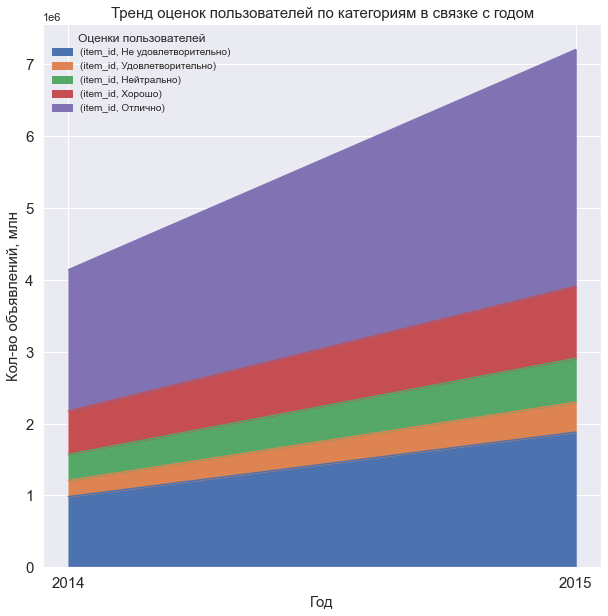

In [41]:
df_X1.pivot_table(index = 'item_starttime',
                           columns = 'result_mentioned_by_user',
                           aggfunc = {'item_id':'count'}).plot(kind = 'area', figsize = (10,10), fontsize = 15).locator_params(integer=True)
plt.style.use('seaborn')
plt.xlabel('Год', fontsize = 15) 
plt.ylabel('Кол-во объявлений, млн', fontsize = 15)
plt.title('Тренд оценок пользователей по категориям в связке с годом', fontsize = 15)
plt.legend(title = 'Оценки пользователей')

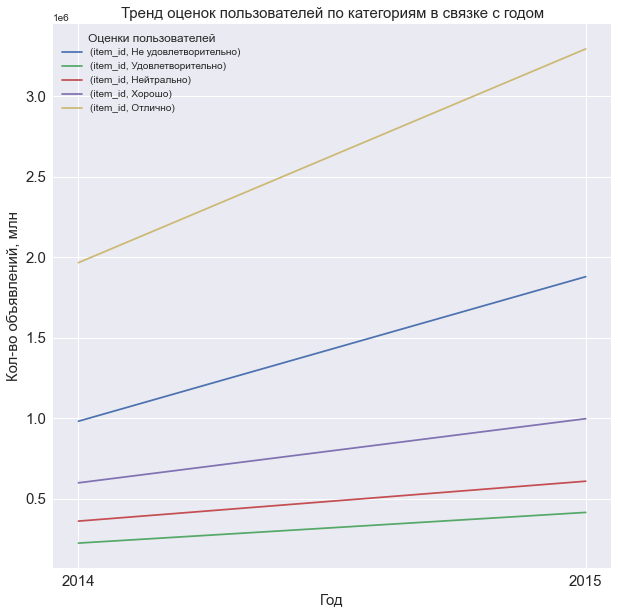

In [42]:
df_X1.pivot_table(index = 'item_starttime',
                           columns = 'result_mentioned_by_user',
                           aggfunc = {'item_id':'count'}).plot(kind = 'line', figsize = (10,10), fontsize = 15).locator_params(integer=True)
plt.style.use('seaborn')
plt.xlabel('Год', fontsize = 15) 
plt.ylabel('Кол-во объявлений, млн', fontsize = 15)
plt.title('Тренд оценок пользователей по категориям в связке с годом', fontsize = 15)
plt.legend(title = 'Оценки пользователей')

По динамике видно, что пользователи, имеющие негативную оценку работе службы поддержки (не удовлетворительно, удовлетворительно) в последствии размещают меньше объявлений.

Составим два датасета:

1. Пользователи, сгруппированные по времени размещения первого объявления (логичнее, чем по дате регистрации)

In [44]:
first_subset1 = df_X1.pivot_table(index = ['user_first_listing_date','item_starttime'],
                           columns = 'result_mentioned_by_user',
                           aggfunc = {'item_id':'count'})
first_subset1

item_id                    \
result_mentioned_by_user               Не удовлетворительно Удовлетворительно   
user_first_listing_date item_starttime                                          
2008                    2014                           7058               916   
                        2015                          16483              1573   
2009                    2014                          18128              6057   
                        2015                          14582              7354   
2010                    2014                         169196             29020   
                        2015                         233461             37675   
2011                    2014                         174101             50371   
                        2015                         207713             61070   
2012                    2014                         242497             53481   
                        2015                         272171             56297   
2013                    2014                         210855             53412   
                        2015                         254570             65457   
2014                    2014                         160958             32644   
                        2015                         300833             78902   
2015                    2014                              0                 0   
                        2015                         580660            108087   

                                                                   
result_mentioned_by_user               Нейтрально  Хорошо Отлично  
user_first_listing_date item_starttime                             
2008                    2014                 2805   10788   12067  
                        2015                 5876   32661   23539  
2009                    2014                 5817   12869   44010  
                        2015                 7676   19574   49806  
2010                    2014                37668   54523  220464  
                        2015                47858   87169  274842  
2011                    2014                76385  174219  551118  
                        2015                86718  157616  591796  
2012                    2014                96349  130282  448936  
                        2015               141350  196016  527750  
2013                    2014                87594  146750  419196  
                        2015               116461  199575  577182  
2014                    2014                55822   70701  271698  
                        2015                94066  139271  524931  
2015                    2014                    0       0       0  
                        2015               110192  166555  725192

2. Кол-во размещенных объявлений, имеющих количественную оценку в привязке к периодам, в которых эти объявления были размещены

In [60]:
second_drop1 = df_X1.drop(['ticket_category', 'request_id', 'activity_start_dt', 'spent_time_hours',
        'month', 'user_registration_time', 'item_category', 'user_id'], axis = 1)

In [62]:
s1_w_2015 = second_drop1[second_drop1['user_first_listing_date'] == 2015].index
second_drop1.drop(s1_w_2015, inplace = True)

In [64]:
second_subset1 = second_drop1.pivot_table(index = 'user_first_listing_date',
                           columns = ['result_mentioned_by_user', 'item_starttime'],
                           aggfunc = {'item_id':'count'}, margins = True)
second_subset1

item_id                             \
result_mentioned_by_user Не удовлетворительно          Удовлетворительно   
item_starttime                           2014     2015              2014   
user_first_listing_date                                                    
2008                                     7058    16483               916   
2009                                    18128    14582              6057   
2010                                   169196   233461             29020   
2011                                   174101   207713             50371   
2012                                   242497   272171             53481   
2013                                   210855   254570             53412   
2014                                   160958   300833             32644   
All                                    982793  1299813            225901   

                                                                              \
result_mentioned_by_user         Нейтрально          Хорошо          Отлично   
item_starttime              2015       2014    2015    2014    2015     2014   
user_first_listing_date                                                        
2008                        1573       2805    5876   10788   32661    12067   
2009                        7354       5817    7676   12869   19574    44010   
2010                       37675      37668   47858   54523   87169   220464   
2011                       61070      76385   86718  174219  157616   551118   
2012                       56297      96349  141350  130282  196016   448936   
2013                       65457      87594  116461  146750  199575   419196   
2014                       78902      55822   94066   70701  139271   271698   
All                       308328     362440  500005  600132  831882  1967489   

                                            
result_mentioned_by_user               All  
item_starttime               2015           
user_first_listing_date                     
2008                        23539   113766  
2009                        49806   185873  
2010                       274842  1191876  
2011                       591796  2131107  
2012                       527750  2165129  
2013                       577182  2131052  
2014                       524931  1729826  
All                       2569846  9648629

In [65]:
itogo = second_drop1.pivot_table(index = 'result_mentioned_by_user',
                           columns = 'item_starttime',
                           aggfunc = {'item_id':'count'})
itogo

item_id         
item_starttime               2014     2015
result_mentioned_by_user                  
Не удовлетворительно       982793  1299813
Удовлетворительно          225901   308328
Нейтрально                 362440   500005
Хорошо                     600132   831882
Отлично                   1967489  2569846

In [66]:
itog1 = {'2014': itogo.iloc[:,0], '2015':itogo.iloc[:,1],
        'growth_trend': (itogo.iloc[:,1]/itogo.iloc[:,0]).round(2),
        'avg_growth_trend': (((itogo.iloc[:,1]/itogo.iloc[:,0]).sum()).round(1)/len(itogo.iloc[:,0])).round(2),
        'prediction_2015': (itogo.iloc[:,0]*(((itogo.iloc[:,1]/itogo.iloc[:,0]).sum()).round(1)/len(itogo.iloc[:,0])).round(2)),
        'difference': ((itogo.iloc[:,0]*(((itogo.iloc[:,1]/itogo.iloc[:,0]).sum()).round(1)/len(itogo.iloc[:,0])).round(2))-itogo.iloc[:,1]).round(0)}

In [71]:
df_difference1 = pd.DataFrame(data = itog1)
df_difference1 \
    .rename(columns = {'growth_trend':'Динамика роста','avg_growth_trend':'Ср. динамика роста', 'prediction_2015':'Прогнозное значение на 2015 год', 'difference':'Разница'}, level = 0)

,2014,2015,Динамика роста,Ср. динамика роста,Прогнозное значение на 2015 год,Разница
result_mentioned_by_user,,,,,,
Не удовлетворительно,982793,1299813,1.32,1.36,1336598.48,36785.0
Удовлетворительно,225901,308328,1.36,1.36,307225.36,-1103.0
Нейтрально,362440,500005,1.38,1.36,492918.40,-7087.0
Хорошо,600132,831882,1.39,1.36,816179.52,-15702.0
Отлично,1967489,2569846,1.31,1.36,2675785.04,105939.0


In [75]:
from sklearn.linear_model import LinearRegression

In [103]:
# data = pd.read_csv('data.csv')  # load data set
X = df_difference1.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df_difference1.iloc[:, 5].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

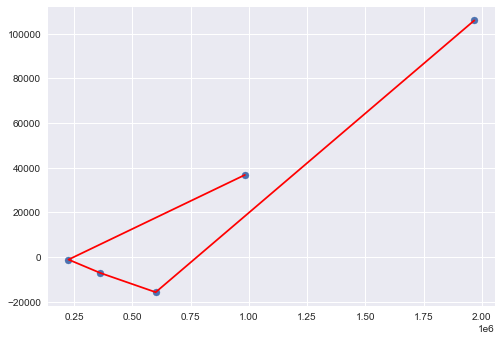

In [104]:
plt.scatter(X, Y)
plt.plot(X, Y, color='red')
plt.show()

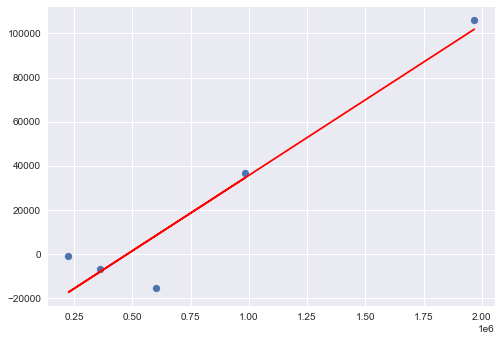

In [105]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

Как мы можем заметить из таблицы, при оценках "Не удовлетворительно" и "Удовлетворительно" количество с годом возросло, хотя при среднем темпе должно было быть меньше => служба не очень хорошо справляется с работой. 
И суммарно составляет 36785-1103 = 35681 оценок.

Далее рассчитаем сколько в среднем приходится объявлений на 1 пользователя:

In [68]:
third_subset1 = df_X1.pivot_table(index = ['user_id', 'item_starttime'],
                           columns = 'item_starttime',
                           aggfunc = {'item_id':'count'}).reset_index()
third_subset1

user_id item_starttime item_id       
item_starttime                                  2014   2015
0                 100 000 209           2014     6.0    NaN
1                 100 000 209           2015     NaN    8.0
2                 100 000 242           2014    21.0    NaN
3                 100 000 242           2015     NaN  163.0
4                 100 000 540           2014     6.0    NaN
...                       ...            ...     ...    ...
145394          9 993 500 066           2015     NaN   22.0
145395          9 996 250 021           2014   538.0    NaN
145396          9 996 250 021           2015     NaN  455.0
145397          9 997 000 160           2014    11.0    NaN
145398          9 997 000 160           2015     NaN   40.0

[145399 rows x 4 columns]

In [69]:
itog2 = {
        'number_of_users': [third_subset1[third_subset1['item_starttime'] == 2014.0]['user_id'].count(), 
                        third_subset1[third_subset1['item_starttime'] == 2015.0]['user_id'].count()],
        'number_of_items': third_subset1['item_id'].sum()}
df_avg = pd.DataFrame(data = itog2)
df_avg

,number_of_users,number_of_items
item_starttime,,
2014,59709,4138755.0
2015,85690,7200560.0


In [107]:
df_avg['avg_items_per_user'] = third_subset1['item_id'].mean().round(0)
df_avg .rename(columns = {'number_of_users':'Кол-во пользователей','number_of_items':'Кол-во объявлений', 'avg_items_per_user':'Ср. кол-во объявлений на 1 пользователя'}, level = 0)

,Кол-во пользователей,Кол-во объявлений,Ср. кол-во объявлений на 1 пользователя
item_starttime,,,
2014,59709,4138755.0,69.0
2015,85690,7200560.0,84.0


Количество недополученных объявлений составит 35681/84 = 424 пользователя сервиса